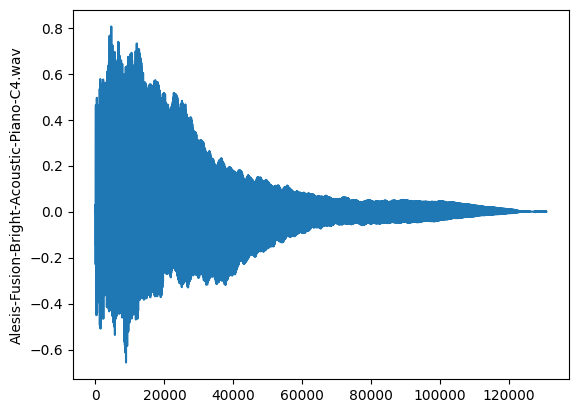

In [6]:
import soundfile as sf
import matplotlib.pyplot as plt

soundfile = 'Alesis-Fusion-Bright-Acoustic-Piano-C4.wav'
data_in, datasamplerate = sf.read(soundfile)
# This means stereo so extract one channel 0
if len(data_in.shape)>1:
    data_in = data_in[:,0]
plt.plot(data_in)
plt.ylabel(soundfile)
plt.show()

In [7]:
import samplerate
converter = 'sinc_best'  # or 'sinc_fastest', ...
desired_sample_rate = 44100 
ratio = desired_sample_rate/datasamplerate
data_out = samplerate.resample(data_in, ratio, converter)
print(data_out)
maxValue = max(data_out)
minValue = min(data_out)
print("length", len(data_out))
print("max value", max(data_out))
print("min value", min(data_out))
vrange = (maxValue - minValue) 
print("value range", vrange)

[ 0.0014906   0.00275176  0.00417547 ... -0.00019894 -0.00022727
 -0.00023149]
length 130786
max value 0.8053991
min value -0.65604275
value range 1.4614419


In [8]:
m68code = "/*    File "+soundfile+ "\r\n *    Sample rate "+str(int(desired_sample_rate)) +" Hz\r\n */\r\n"
m68code += "#define WAV_DATA_LENGTH "+str(len(data_out))+" \r\n\r\n"
m68code += "uint8_t WAV_DATA[] = {\r\n    "
maxitemsperline = 16
itemsonline = maxitemsperline
firstvalue = 0
lastvalue = 0
for v in data_out:
    # scale v to between 0 and 1
    isin = (v-minValue)/vrange   
    v =  int((isin * 1024))
    vstr = str(v)
    if (firstvalue==0):
        firstvalue= v
    lastvalue = v
    m68code+=vstr
    itemsonline-=1
    if (itemsonline>0):
        m68code+=','
    else:
        itemsonline = maxitemsperline
        m68code+=',\r\n    '
        
# keep track of first and last values to avoid
# blip when the loop restarts.. make the end value
# the average of the first and last. 
end_value = int( (firstvalue + lastvalue) / 2)
m68code+=str(end_value)+'    \r\n};'
print(m68code)

/*    File Alesis-Fusion-Bright-Acoustic-Piano-C4.wav
 *    Sample rate 44100 Hz
 */
#define WAV_DATA_LENGTH 130786 

uint8_t WAV_DATA[] = {
    460,461,462,463,462,462,462,462,460,458,457,458,461,465,468,469,
    470,471,471,470,468,467,466,466,466,469,475,481,479,470,456,444,
    439,440,444,447,450,451,450,439,418,388,356,329,311,302,302,307,
    312,316,321,326,324,312,298,299,317,342,360,361,354,355,367,382,
    391,395,398,404,425,458,491,510,525,545,566,579,580,570,551,532,
    518,510,516,542,581,609,609,588,567,556,549,544,541,542,540,528,
    503,474,453,450,458,467,472,477,481,484,486,491,501,525,567,620,
    671,705,720,720,713,708,711,721,737,761,784,783,743,671,590,524,
    482,460,444,426,409,402,404,411,416,416,416,425,452,496,542,569,
    570,547,508,465,423,386,362,365,394,428,446,441,422,397,372,356,
    355,372,396,405,382,337,292,258,234,222,235,278,331,369,378,362,
    335,311,289,270,261,272,298,331,366,397,417,428,445,474,509,534,
    543,533,508,474,436,401,379